Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


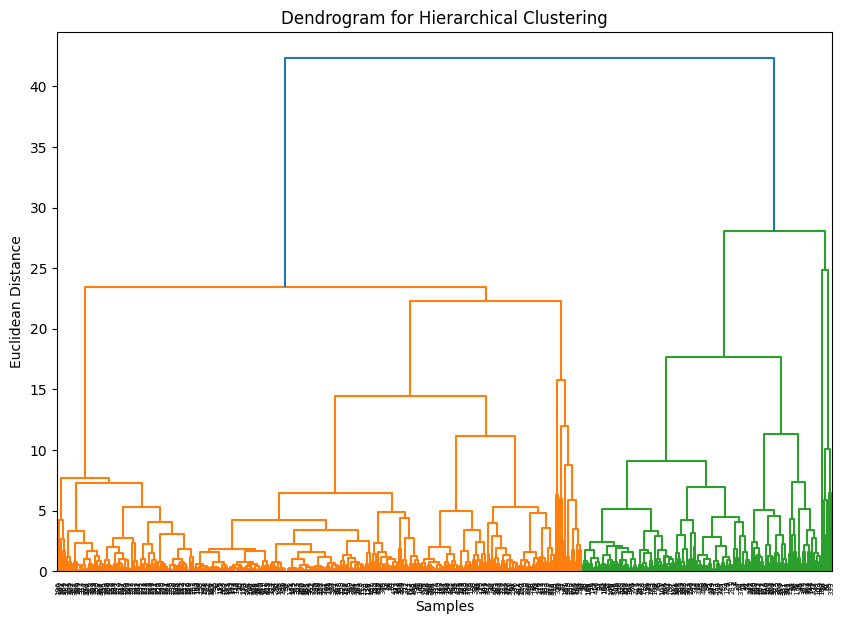

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        1  
4        5185        1  


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
df = pd.read_csv('customers.csv')

# Check for missing values
print(df.isnull().sum())

# If necessary, you can handle missing data, e.g., by filling with the mean or median
# For simplicity, we assume no missing values in this example

# Standardize the data (important for distance-based clustering algorithms)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform hierarchical clustering using the linkage function
Z = linkage(df_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Create clusters by cutting the dendrogram at a specified distance
# You can adjust the number of clusters as needed
max_d = 50  # You can set your threshold here
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster labels to the original data
df['Cluster'] = clusters

# Show the first few rows of the data with the cluster label
print(df.head())

# You can now analyze the clusters and perform further tasks like analyzing cluster centers
